# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 顯示單變量的特徵(平均值、中位數、眾數)
print("mean of app_train['AMT_INCOME_TOTAL']: {}\n".format(app_train['AMT_INCOME_TOTAL'].mean()))
print("median of app_train['AMT_INCOME_TOTAL']: {}\n".format(app_train['AMT_INCOME_TOTAL'].median()))
print("mode of app_train['AMT_INCOME_TOTAL']: {}\n".format(app_train['AMT_INCOME_TOTAL'].mode()))
print("std of app_train['AMT_INCOME_TOTAL']: {}\n".format(app_train['AMT_INCOME_TOTAL'].std()))
print("describe of app_train['AMT_INCOME_TOTAL']:\n{}".format(app_train['AMT_INCOME_TOTAL'].describe()))

mean of app_train['AMT_INCOME_TOTAL']: 168797.9192969845

median of app_train['AMT_INCOME_TOTAL']: 147150.0

mode of app_train['AMT_INCOME_TOTAL']: 0    135000.0
dtype: float64

std of app_train['AMT_INCOME_TOTAL']: 237123.14627883647

describe of app_train['AMT_INCOME_TOTAL']:
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


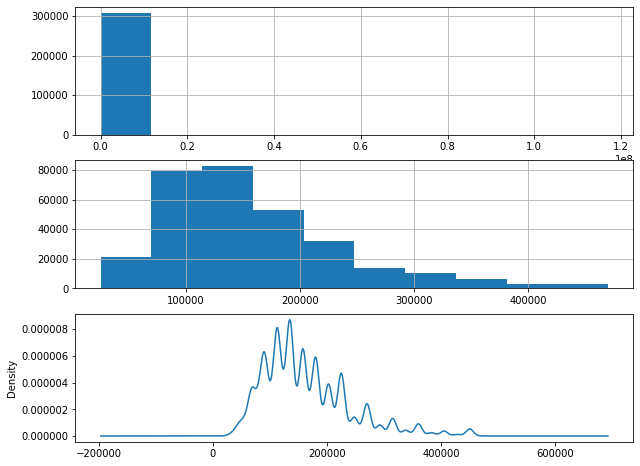

In [6]:
# 畫出app_train['AMT_INCOME_TOTAL']長條圖
# 由圖或app_train['AMT_INCOME_TOTAL']可以得知MAX跟75%有很大的差距。
fig,axes = plt.subplots(3,1,figsize=(10,8))
app_train['AMT_INCOME_TOTAL'].hist(ax=axes[0])

# 所以將最大值濾掉在劃出長條圖及kde(kernek density estimination)
app_train.loc[app_train.loc[:,'AMT_INCOME_TOTAL']<app_train.loc[:,'AMT_INCOME_TOTAL'].quantile(0.99),'AMT_INCOME_TOTAL'].hist(ax=axes[1])
app_train.loc[app_train.loc[:,'AMT_INCOME_TOTAL']<app_train.loc[:,'AMT_INCOME_TOTAL'].quantile(0.99),'AMT_INCOME_TOTAL'].plot(kind='kde',ax=axes[2])